In [ ]:
import importlib
import subprocess
import sys
import gc

def check_and_install_package(package_name, version=None):
    try:
        importlib.import_module(package_name)
        print(f"\n{package_name} is already installed.")
    except ImportError:
        print(f"\n{package_name} is NOT installed. Installing now...")
        if version:
            subprocess.check_call([sys.executable, "-m", "pip", "install", f"{package_name}=={version}"])
        else:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"{package_name} installation completed.")

# List of packages to check along with specific versions if necessary
packages = [
    {"name": "tqdm", "version": None},
    {"name": "pandas", "version": None},
    {"name": "seaborn", "version": None},
    {"name": "gdown", "version": None},
    {"name": "numpy", "version": "1.23.5"}
]


# Checking and installing packages
for package in packages:
    check_and_install_package(package["name"], package["version"])


tqdm is already installed.

pandas is already installed.

seaborn is already installed.

gdown is already installed.

numpy is already installed.


In [ ]:
from google.colab import drive
import pandas as pd

# Mounting Google Drive
drive.mount('/content/drive')

# Directly reading the Parquet file from Google Drive
df_visual = pd.read_parquet('/content/drive/MyDrive/Big Data Analytics - Project/Data Visualization/df_visual.parquet')

# Displaying the DataFrame to verify
print(f"DataFrame has {df_visual.shape[0]} rows and {df_visual.shape[1]} columns")


Mounted at /content/drive
DataFrame has 3100000 rows and 42 columns


In [ ]:
pd.set_option('display.max_columns', None)
df_visual.head(3)

,fuel_type,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,description,engine_displacement,engine_type,exterior_color,franchise_dealer,fuel_tank_volume,height,highway_fuel_economy,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,longitude,major_options,make_name,maximum_seating,mileage,model_name,price,savings_amount,seller_rating,sp_name,torque,transmission,transmission_display,wheel_system_display,wheelbase,width,year,combined_fuel_economy,legroom,log_mileage,major_options_count
0,Gasoline,Sedan,Beaufort,28.0,12,29906,***STOKES USED CAR CENTER*** 2018 Toyota Corol...,1800.0,I4,none,True,13.200000,57.3,35.0,132.0,none,False,32.434898,183.1,2020-08-29,UNKNOWN,-80.710999,['Backup Camera'],Toyota,5.0,42036.0,Corolla,15436.0,113,4.000000,Stokes Used Car Center,128.0,CVT,Continuously Variable Transmission,Front-Wheel Drive,106.3,69.9,2018,31.5,83.7,10.65,1
1,Gasoline,SUV / Crossover,Hopkins,16.0,8,55343,"Only 33,306 Miles! Scores 20 Highway MPG and 1...",3600.0,V6,black clearcoat,True,22.500000,72.6,20.0,285.0,black,False,44.923698,184.9,2020-09-03,BLACK,-93.404297,"['Steel Wheels', 'Bluetooth', 'Remote Start', ...",Jeep,5.0,33360.0,Wrangler Unlimited,33998.0,315,4.840000,Walser Chrysler Dodge Jeep RAM,260.0,A,5-Speed Automatic,Four-Wheel Drive,116.0,73.7,2017,18.0,78.2,10.42,4
2,Gasoline,SUV / Crossover,La Habra,18.0,20,90631,"[!@@Additional Info@@!]Air filtration,Front ai...",3300.0,V6,none,False,18.799999,66.9,25.0,290.0,none,False,33.931900,193.1,2020-08-22,UNKNOWN,-117.931999,"['Leather Seats', 'Alloy Wheels', 'Third Row S...",Hyundai,6.0,119874.0,Santa Fe,11995.0,422,3.466667,Metro Auto OC,252.0,A,6-Speed Automatic,Front-Wheel Drive,110.2,74.2,2014,21.5,82.6,11.69,7


In [ ]:
df_visual.rename(columns={'year': 'manufactured_year'}, inplace=True)

In [ ]:
#loading the necessary libraries for data visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
import itertools

# Listing new feature groups
engine_related = ['engine_displacement', 'horsepower', 'torque']
size_related = ['length', 'width', 'height', 'wheelbase']
fuel_economy_related = ['city_fuel_economy', 'highway_fuel_economy', 'combined_fuel_economy']
sales_related = ['price', 'daysonmarket', 'seller_rating']
transmission_related = ['transmission', 'transmission_display', 'wheel_system_display']
dealer_related = ['dealer_zip', 'listed_date', 'sp_name']
location_related = ['latitude', 'longitude', 'city']
color_related = ['exterior_color', 'interior_color', 'listing_color']
vehicle_attributes = ['fuel_type', 'body_type', 'make_name', 'model_name', 'is_new']
performance_related = ['maximum_seating', 'fuel_tank_volume', 'horsepower', 'torque']
date_related = ['listed_date', 'year']
miscellaneous = ['log_mileage', 'major_options_count', 'savings_amount']

# Combining all feature groups for subsampling
all_feature_groups = [
    engine_related, size_related, fuel_economy_related, sales_related,
    transmission_related, dealer_related, location_related, color_related,
    vehicle_attributes, performance_related, date_related, miscellaneous
]

# Function to generate combinations from different feature sets
def generate_combinations(feature_groups, n=2):
    all_combinations = []
    for combo in itertools.combinations(feature_groups, n):
        combined = list(itertools.chain.from_iterable(combo))  # Flattenning the list
        all_combinations.append(combined)
    return all_combinations

# Generating 2-group and 3-group combinations
two_group_combinations = generate_combinations(all_feature_groups, n=2)
three_group_combinations = generate_combinations(all_feature_groups, n=3)

print("Different Combinations created from the groups...\n")

Different Combinations created from the groups...



In [ ]:
'''
# Display the generated combinations
print("Two-group combinations:")
for combo in two_group_combinations:
    print(combo)

print("\nThree-group combinations:")
for combo in three_group_combinations:
    print(combo)
'''

---------------

### **City_fuel_economy**

In [ ]:
# Calculating statistics
mean_val = df_visual['city_fuel_economy'].mean()
median_val = df_visual['city_fuel_economy'].median()
mode_val = df_visual['city_fuel_economy'].mode()[0]
min_val = df_visual['city_fuel_economy'].min()
max_val = df_visual['city_fuel_economy'].max()

print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")
print(f"Min: {min_val:.2f}")
print(f"Max: {max_val:.2f}")



Mean: 22.70
Median: 22.69
Mode: 22.69
Min: 8.00
Max: 127.00


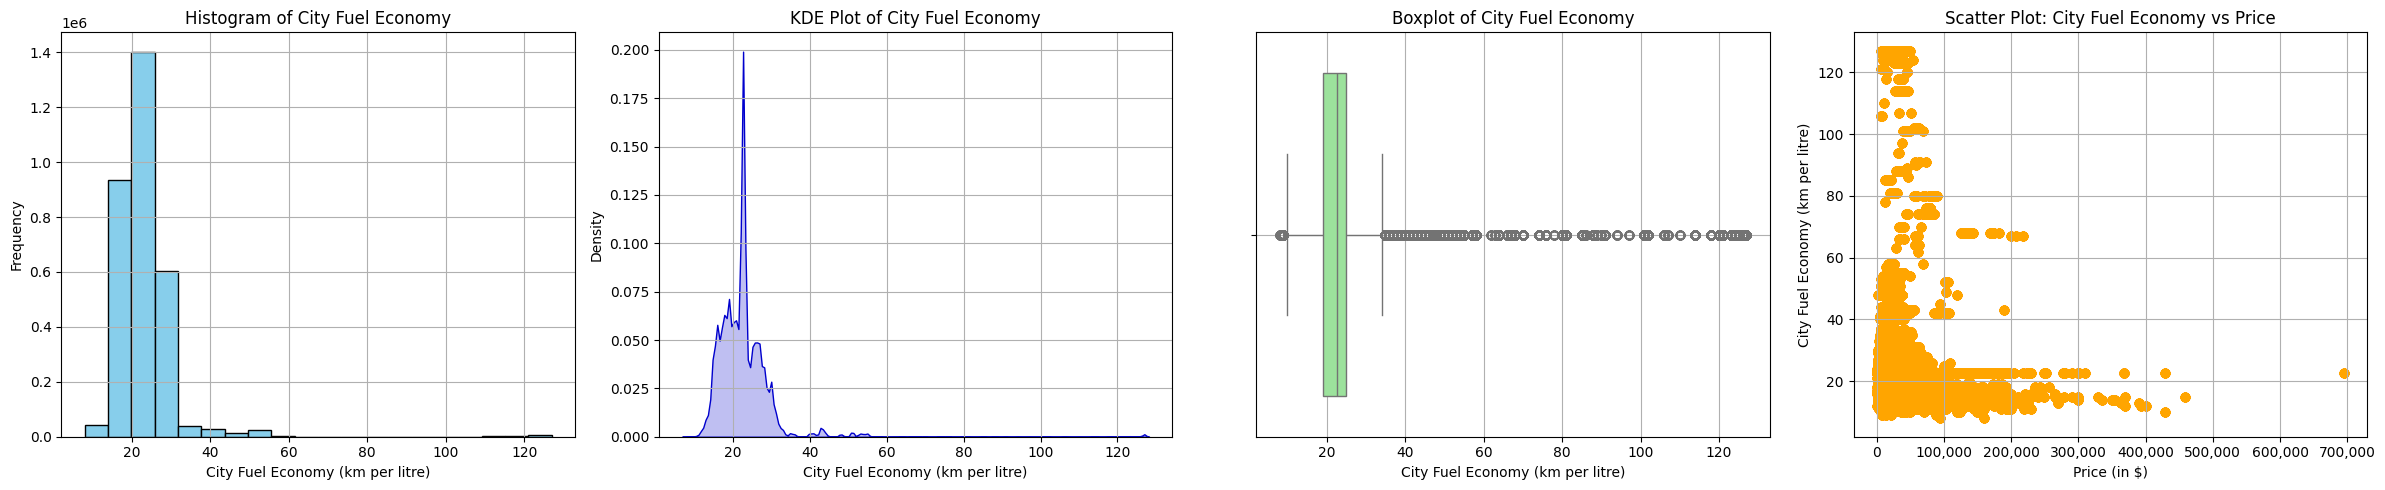

In [ ]:
import warnings
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
warnings.filterwarnings("ignore")

# Creating a figure with 4 subplots (4 plots horizontally)
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# 1. Histogram for Binning
axes[0].hist(df_visual['city_fuel_economy'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of City Fuel Economy')
axes[0].set_xlabel('City Fuel Economy (km per litre)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# 2. KDE plot for Distribution
sns.kdeplot(df_visual['city_fuel_economy'], shade=True, color='mediumblue', ax=axes[1])
axes[1].set_title('KDE Plot of City Fuel Economy')
axes[1].set_xlabel('City Fuel Economy (km per litre)')
axes[1].grid(True)

# 3. Boxplot for Outliers Detection
sns.boxplot(x=df_visual['city_fuel_economy'], color='lightgreen', ax=axes[2])
axes[2].set_title('Boxplot of City Fuel Economy')
axes[2].set_xlabel('City Fuel Economy (km per litre)')
axes[2].grid(True)

# 4. Scatter plot of city_fuel_economy vs price with comma-separated x-axis
axes[3].scatter(df_visual['price'], df_visual['city_fuel_economy'], color='orange', alpha=0.6)
axes[3].set_title('Scatter Plot: City Fuel Economy vs Price')
axes[3].set_xlabel('Price (in $)')
axes[3].set_ylabel('City Fuel Economy (km per litre)')

# Formatting x-axis with comma separators for the scatter plot
axes[3].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
axes[3].grid(True)

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Creating bins
bins = pd.cut(df_visual['city_fuel_economy'], bins=25)
proportion = bins.value_counts(normalize=True) * 100  # Get the proportion in percentage

# Rounding bin edges to whole numbers and proportions
proportion.index = proportion.index.map(lambda x: f"({int(round(x.left))}, {int(round(x.right))}]")
proportion = proportion.astype(int)

# Converting to DataFrame for nicer printing
proportion_df = pd.DataFrame({
    'Bin_Range': proportion.index,
    'Proportion (%)': proportion.values
}).reset_index(drop=True)

# Filtering out rows where Proportion (%) is zero
proportion_df = proportion_df[proportion_df['Proportion (%)'] > 0]

# Displaying the DataFrame in the format you want
print(proportion_df.to_string(index=False))



Bin_Range  Proportion (%)
 (22, 27]              37
 (18, 22]              30
 (13, 18]              17
 (27, 32]               9
 (32, 37]               1


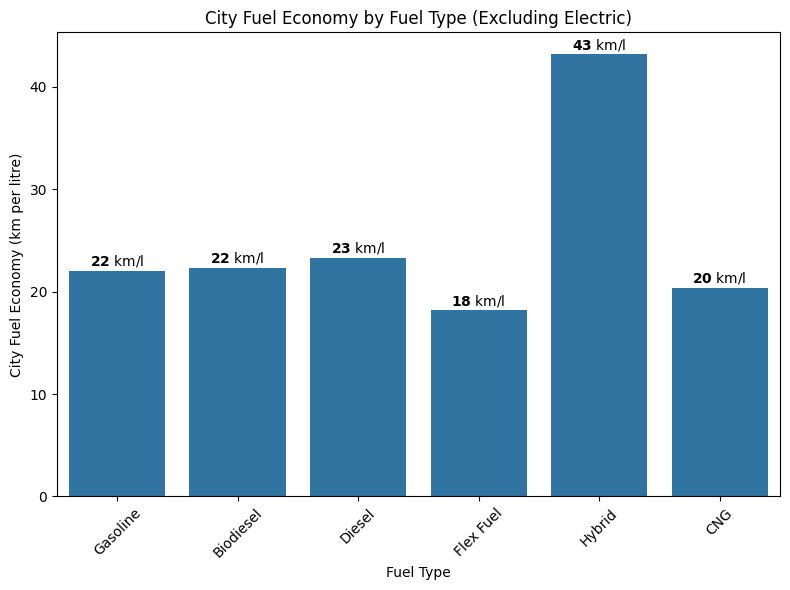

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering out rows where the fuel type is 'Electric'
df_filtered = df_visual[df_visual['fuel_type'] != 'Electric']
df_filtered['fuel_type'] = df_filtered['fuel_type'].replace({
    'Flex Fuel Vehicle': 'Flex Fuel',
    'Compressed Natural Gas': 'CNG'
})

# Setting figure size before plotting
plt.figure(figsize=(8, 6))

# Creating the bar plot without confidence intervals
barplot = sns.barplot(x='fuel_type', y='city_fuel_economy', data=df_filtered, ci=None)

# Adding title and labels
plt.title('City Fuel Economy by Fuel Type (Excluding Electric)')
plt.xlabel('Fuel Type')
plt.ylabel('City Fuel Economy (km per litre)')


for p in barplot.patches:
    height = p.get_height()
    plt.text(x=p.get_x() + p.get_width() / 2,
             y=height + 0.5,
             s=f'$\\bf{{{int(height)}}}$ km/l',
             ha='center')


# Adjusting the spacing to avoid overlap
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

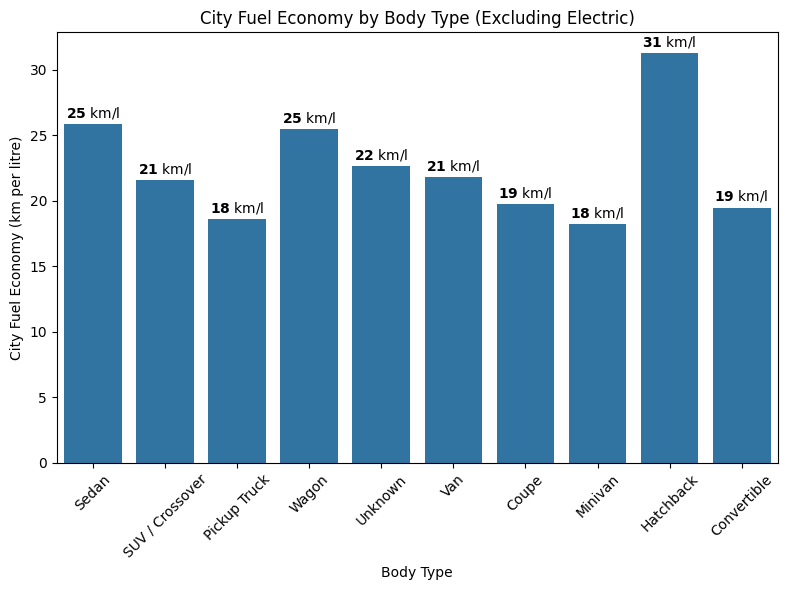

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting figure size before plotting
plt.figure(figsize=(8, 6))

# Creating the bar plot for body type without confidence intervals
barplot = sns.barplot(x='body_type', y='city_fuel_economy', data=df_filtered, ci=None)

# Adding title and labels
plt.title('City Fuel Economy by Body Type (Excluding Electric)')
plt.xlabel('Body Type')
plt.ylabel('City Fuel Economy (km per litre)')

# Annotating values on top of the bars
for p in barplot.patches:
    height = p.get_height()
    plt.text(x=p.get_x() + p.get_width() / 2,
             y=height + 0.5,
             s=f'$\\bf{{{int(height)}}}$ km/l',
             ha='center')

# Adjusting the spacing to avoid overlap
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

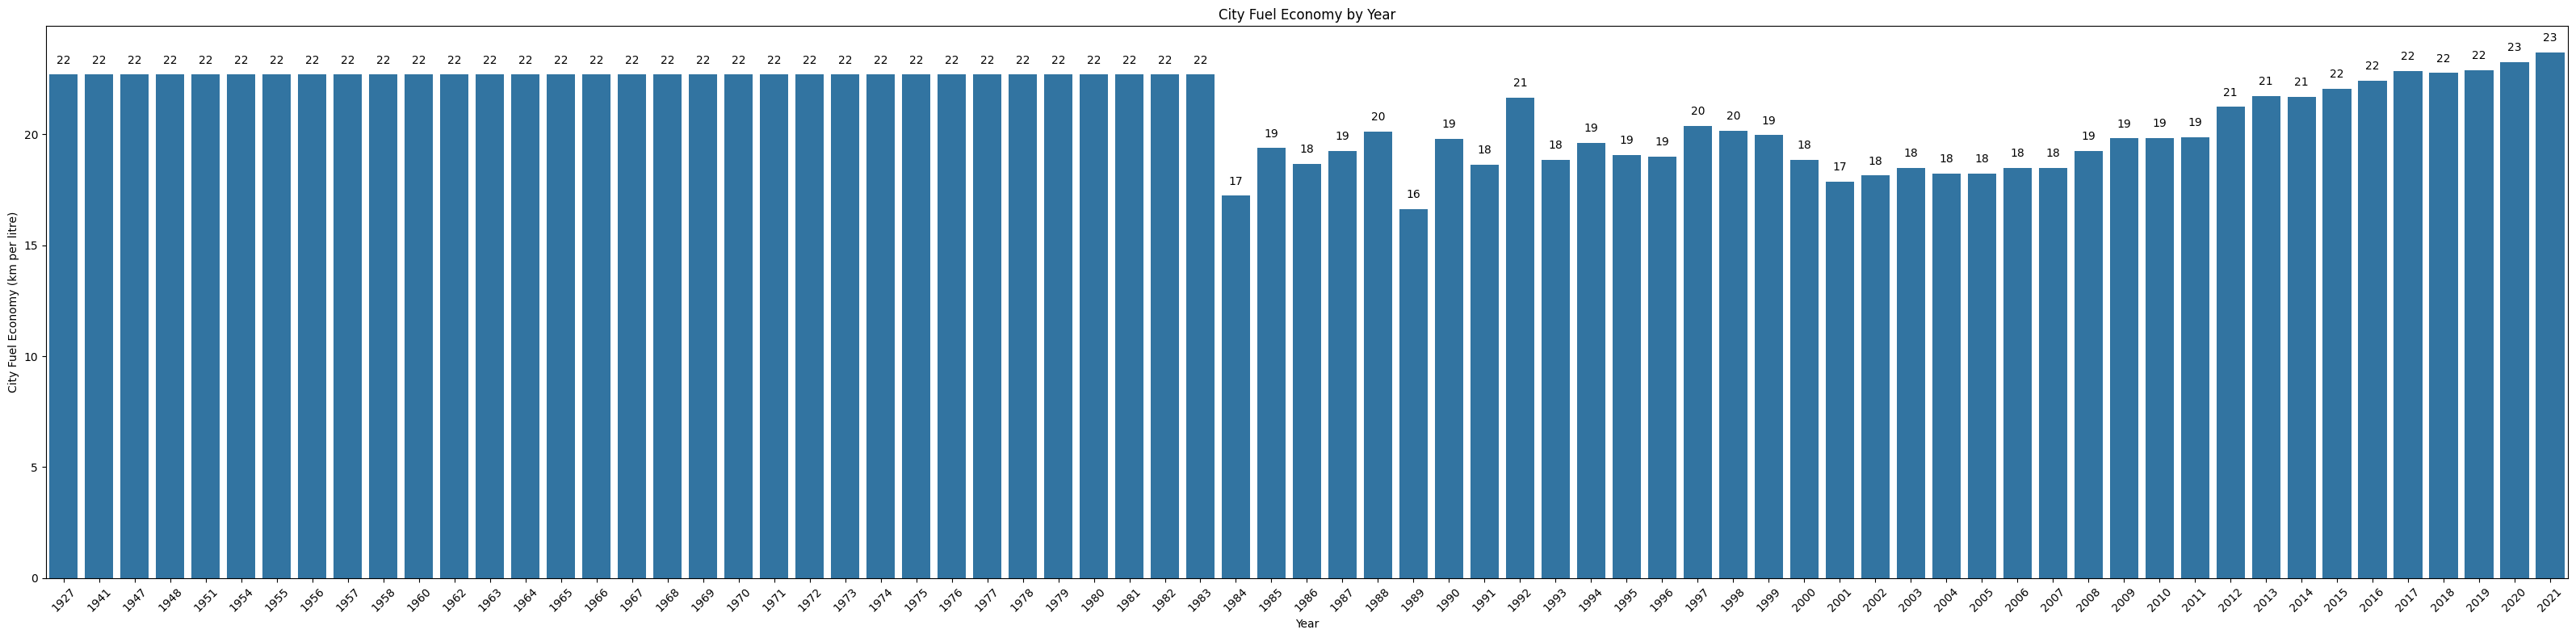

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting figure size before plotting
plt.figure(figsize=(32, 8))

# Creating the bar plot for City Fuel Economy by Year
barplot = sns.barplot(x='year', y='city_fuel_economy', data=df_visual, ci=None)

# Adding title and labels
plt.title('City Fuel Economy by Year')
plt.xlabel('Year')
plt.ylabel('City Fuel Economy (km per litre)')

# Annotating values on top of the bars
for p in barplot.patches:
    height = p.get_height()
    plt.text(x=p.get_x() + p.get_width() / 2,
             y=height + 0.5,
             s=f'{int(height)}' ,
             ha='center')

# Adjusting layout to avoid overlap
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

### **daysonthemarket**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting figure size
plt.figure(figsize=(10, 6))

# Creating the histogram for days on market
sns.histplot(df_visual['daysonmarket'], bins=30, kde=False, color='blue')

# Adding title and labels
plt.title('Distribution of Days on Market')
plt.xlabel('Days on Market')
plt.ylabel('Frequency')

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))

# Creating a bar plot to show average days on market grouped by year
barplot = sns.barplot(x='year', y='daysonmarket', data=df_visual, ci=None)

# Adding title and labels
plt.title('Average Days on Market by Year')
plt.xlabel('Year')
plt.ylabel('Average Days on Market')

# Annotating values on top of the bars
for p in barplot.patches:
    height = p.get_height()
    plt.text(x=p.get_x() + p.get_width() / 2,
             y=height + 1,
             s=f'{int(height)} days',
             ha='center', fontweight='bold')

# Rotating x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
sns.scatterplot(x='price', y='daysonmarket', data=df_visual)
plt.title('Days on Market vs Price')
plt.xlabel('Price')
plt.ylabel('Days on Market')
plt.show()


In [ ]:
sns.barplot(x='year', y='daysonmarket', data=df_visual, ci=None)
plt.title('Average Days on Market by Year')
plt.xlabel('Year')
plt.ylabel('Average Days on Market')
plt.show()


In [ ]:
sns.barplot(x='fuel_type', y='daysonmarket', data=df_visual, ci=None)
plt.title('Average Days on Market by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Days on Market')
plt.show()


In [ ]:
sns.scatterplot(x='seller_rating', y='daysonmarket', data=df_visual)
plt.title('Days on Market vs Seller Rating')
plt.xlabel('Seller Rating')
plt.ylabel('Days on Market')
plt.show()



----------------

In [ ]:
import os
df_visual.rename(columns={'year': 'manufactured_year'}, inplace=True)

# Clearing all cached data in Spark (DataFrames, RDDs, etc.)
spark.catalog.clearCache()

# Stopping the Spark session
spark.stop()

# Listing all variables and delete them
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

# Performing garbage collection
import gc
_ = gc.collect()